# 🎒 Student Performance Analysis


# 📋 Introduction

Analyze the student performance dataset to understand the key factors influencing exam scores, using a structured approach that includes **data cleaning** , **exploratory data analysis** (EDA), and predictive modeling with **Random Forest**.



*   Dataset: Student Performance Factors Dataset from Kaggle
*   Tools: **Pandas**, **Seaborn**, **Matplotlib**,




In [53]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# load the dataset
data = pd.read_csv('StudentPerformanceFactors.csv')

# display the first 5 rows of the dataset
data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


**Overview:**

The Student Performance dataset contains detailed information about various factors influencing students' exam scores, including their study habits, family backgroundand more. We'll begin by cleaning and exploring the data, followed by identifying key predictors of exam scores through feature importance analysis.

In [40]:
# Data exploration

# Check the dimensions of the data
data.shape

(6607, 20)

In [41]:
# Concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Summary:

* Columns like Teacher_Quality, Parental_Education_Level, and Distance_from_Home have some missing values that will require handling.

In [42]:
# Statistical summary of the numerical features
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [43]:
# Check for missing values
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [44]:
# Handling missing Teacher Quality values using group based imputation
data['Teacher_Quality'] = data.groupby('School_Type')['Teacher_Quality'].transform(lambda x: x.fillna(x.mode()[0]))

# Handling missing Parental Education Level using group based imputation
data['Parental_Education_Level'] = data.groupby('Family_Income')['Parental_Education_Level'].transform(lambda x: x.fillna(x.mode()[0]))

# Fill missed Distance from Home values with the most common value
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)

# Check the data again
data.isnull().sum()



<ipython-input-44-1d5f64b0859a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [45]:
# Checking outliers for all numerical columns using the IQR method

# Define an array of numerical columns
numerical_columns = ['Hours_Studied', 'Attendance',  'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

     # Identify outliers
    outliers = (data[col] < lower_bound) | (data[col] > upper_bound)

    # Print the number of outliers in the column
    print(f"Column: {col}")
    print(f"  Number of outliers: {outliers.sum()}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print("-" * 40)


Column: Hours_Studied
  Number of outliers: 43
  Lower Bound: 4.0, Upper Bound: 36.0
----------------------------------------
Column: Attendance
  Number of outliers: 0
  Lower Bound: 40.0, Upper Bound: 120.0
----------------------------------------
Column: Sleep_Hours
  Number of outliers: 0
  Lower Bound: 3.0, Upper Bound: 11.0
----------------------------------------
Column: Previous_Scores
  Number of outliers: 0
  Lower Bound: 25.5, Upper Bound: 125.5
----------------------------------------
Column: Tutoring_Sessions
  Number of outliers: 430
  Lower Bound: -0.5, Upper Bound: 3.5
----------------------------------------
Column: Physical_Activity
  Number of outliers: 0
  Lower Bound: -1.0, Upper Bound: 7.0
----------------------------------------
Column: Exam_Score
  Number of outliers: 104
  Lower Bound: 59.0, Upper Bound: 75.0
----------------------------------------


# Outliers detected:

Hours_Studied: 43 outliers, with values below 4 or above 36.

Tutoring_Sessions: 430 outliers, with values outside the range -0.5 to 3.5

Exam_Score: 104 outliers, with values below 59 or above 75.

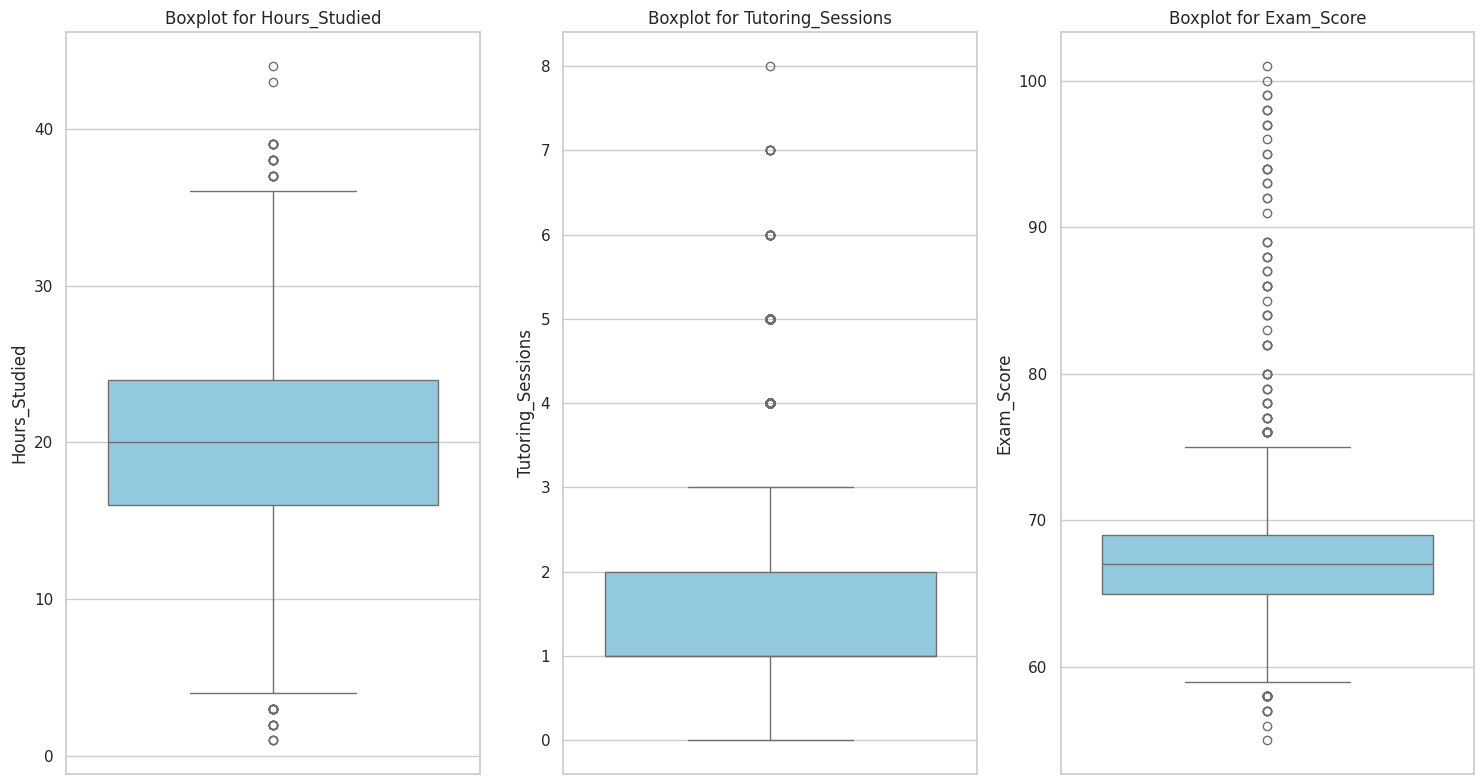

In [46]:
#  Visualize Outliers

# List of columns with outliers
outlier_columns = ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']

# Set up the figure
plt.figure(figsize=(15, 8))

# Create a boxplot for each column with outliers
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)
    plt.tight_layout()

# Show the plots
plt.show()

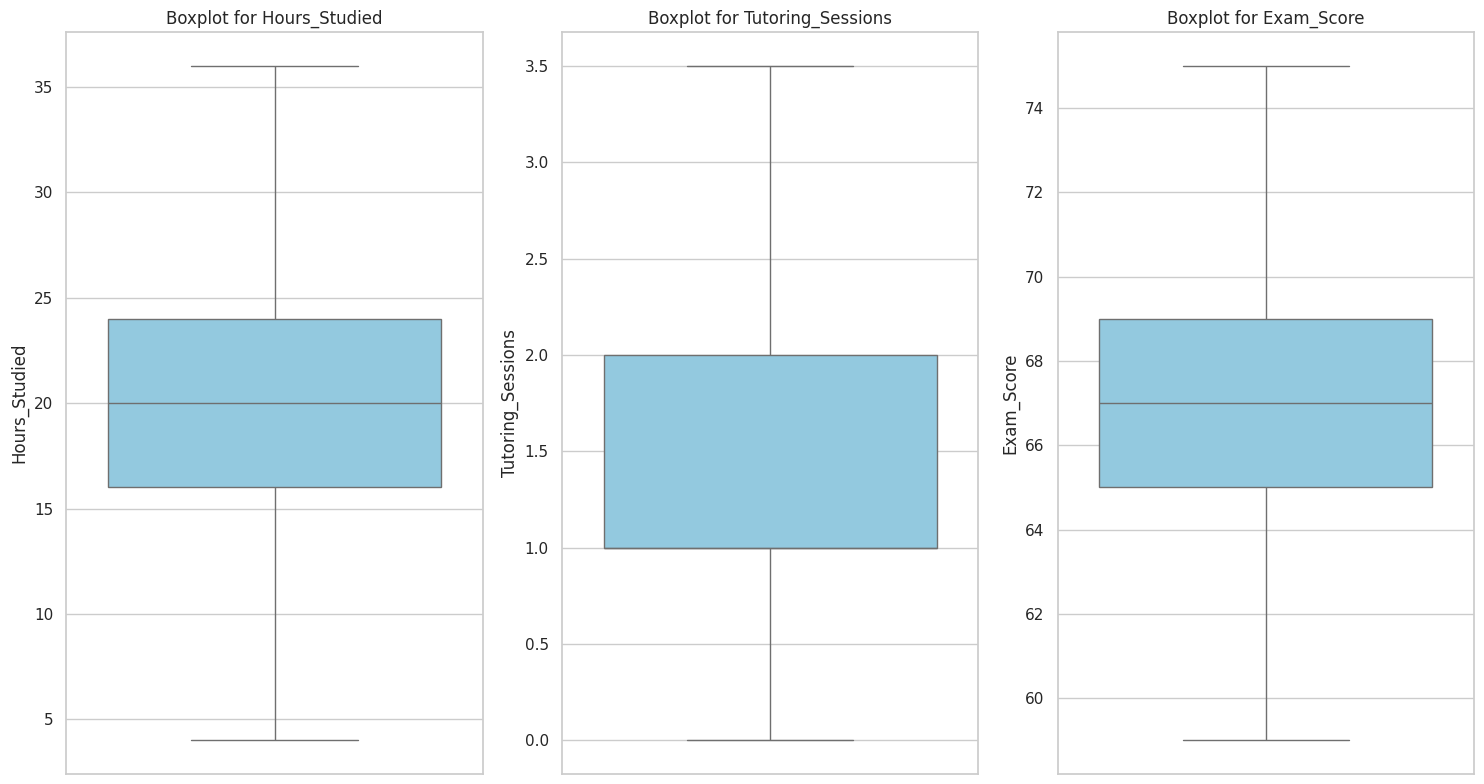

In [47]:
# Cap outliers
for col in outlier_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Any value below the lower bound is replaced with the lower bound.
    # Any value above the upper bound is replaced with the upper bound.
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Set up the figure
plt.figure(figsize=(15, 8))

# Create a subplot for its boxplot
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 3, i)  # Create a subplot for each column
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)
    plt.tight_layout()

# Show the plots
plt.show()

# Explanation:
We used the Interquartile Range (IQR) method to identify and cap extreme values to reduce the influence of outliers.

                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009990     0.010697         0.024307   
Attendance             -0.009990    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010697   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024307   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.015836    0.013976    -0.008728        -0.018995   
Physical_Activity       0.004760   -0.022435    -0.000378        -0.011274   
Exam_Score              0.504684    0.660555    -0.014136         0.195737   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.015836           0.004760    0.504684  
Attendance                  0.013976          -0.022435    0.660555  
Sleep_Hours                -0.008728          -0.000378   -0.014136  
Previous_Scores            -0.018995          -0.011274    0.195737  
Tutoring_Sessions        

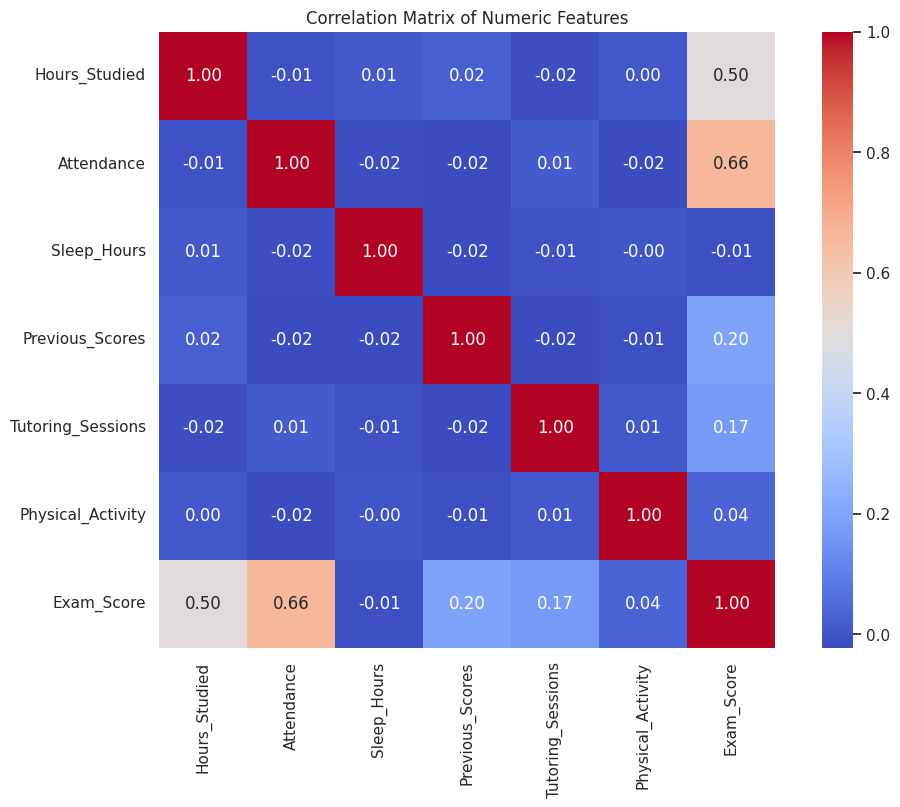

In [48]:
# Exploratory Data Analysis

# Correlation matrix of numeric Features

# Select only numerical variables
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix
print(corr_matrix)

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Key insights:
* **Attendance** (0.66) : A relatively strong positive correlation indicates that better attendance is strongly linked to higher exam performance.

* **Hours_Studied** (0.5): A moderate positive correlation shows that the more hours a student studies, the better their exam scores.

* **Previous_Scores** (0.2): A weak positive correlation  suggests that prior academic performance slightly influences current exam scores.






Correlations with Exam_Score:
Exam_Score                    1.000000
Peer_Influence                0.100217
Distance_from_Home            0.083944
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Parental_Education_Level      0.040381
Gender                       -0.002032
School_Type                  -0.008844
Motivation_Level             -0.014910
Family_Income                -0.026484
Teacher_Quality              -0.061772
Learning_Disabilities        -0.085066
Access_to_Resources          -0.090503
Parental_Involvement         -0.094289
Name: Exam_Score, dtype: float64


<ipython-input-51-5094c542db5b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_exam_score.index, y=correlations_with_exam_score.values, palette='viridis')


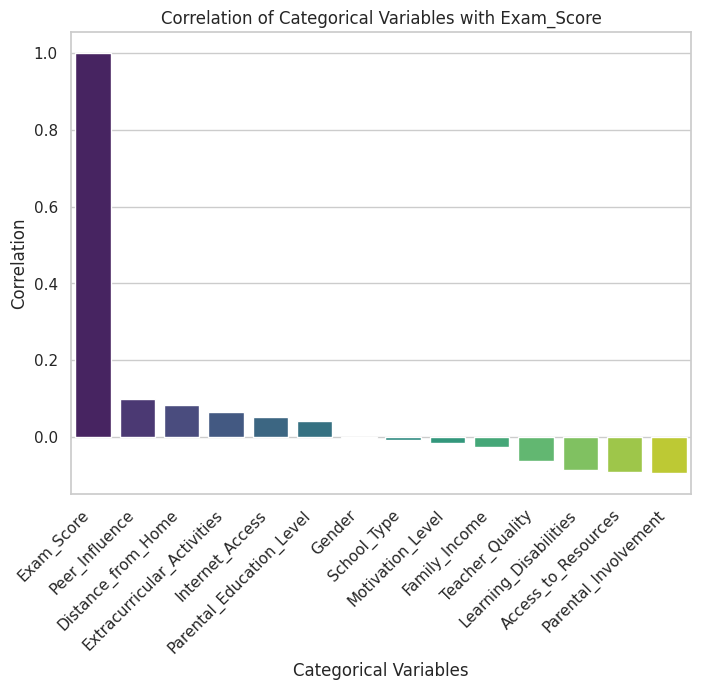

In [51]:
# Create a copy of the dataset
encoded_data = data.copy()

# Identify categorical variables
categorical_columns = data.select_dtypes(include='object').columns

# Ensure Exam_Score exists in the dataset
if 'Exam_Score' not in encoded_data.columns:
    raise ValueError("Exam_Score column is missing from the dataset!")

# Encode the categorical variables
encoder = LabelEncoder()
for col in categorical_columns:
    encoded_data[col] = encoder.fit_transform(data[col])

# Include only the encoded categorical variables and Exam_Score
columns_to_analyze = list(categorical_columns) + ['Exam_Score']

# Calculate correlation of categorical variables with Exam_Score
correlations_with_exam_score = encoded_data[columns_to_analyze].corr()['Exam_Score'].sort_values(ascending=False)

# Print the correlations
print("Correlations with Exam_Score:")
print(correlations_with_exam_score)

# Plot the correlations for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations_with_exam_score.index, y=correlations_with_exam_score.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Correlation of Categorical Variables with Exam_Score")
plt.ylabel("Correlation")
plt.xlabel("Categorical Variables")
plt.show()

<ipython-input-55-40912eac67d6>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


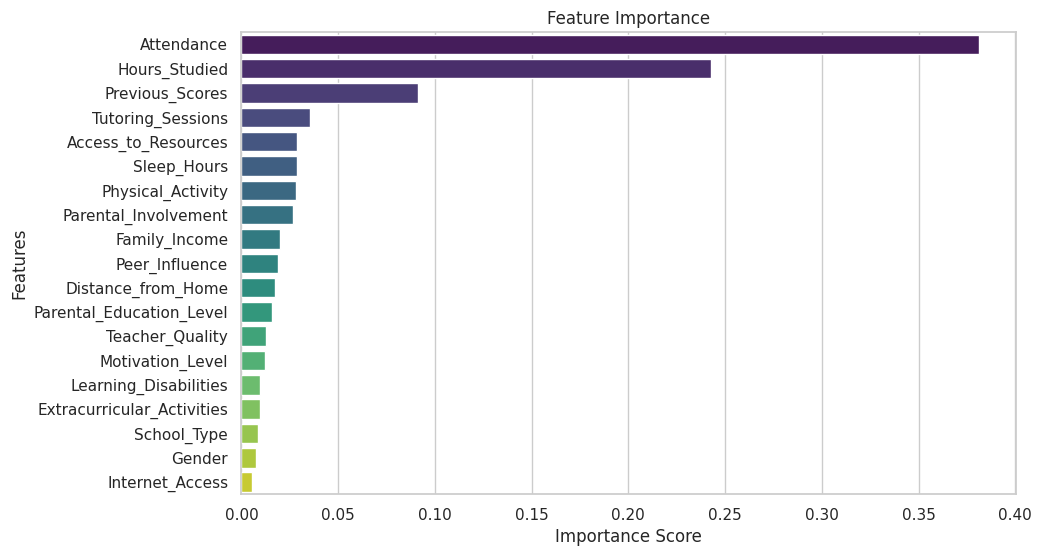

                       Feature  Importance
1                   Attendance    0.381449
0                Hours_Studied    0.242662
6              Previous_Scores    0.091385
9            Tutoring_Sessions    0.035440
3          Access_to_Resources    0.028868
5                  Sleep_Hours    0.028611
14           Physical_Activity    0.028010
2         Parental_Involvement    0.026583
10               Family_Income    0.019824
13              Peer_Influence    0.018788
17          Distance_from_Home    0.017211
16    Parental_Education_Level    0.015887
11             Teacher_Quality    0.012522
7             Motivation_Level    0.012154
15       Learning_Disabilities    0.009762
4   Extracurricular_Activities    0.009390
12                 School_Type    0.008524
18                      Gender    0.007425
8              Internet_Access    0.005504


In [55]:
# Define features (X) and target (y)
X = data_encoded.drop(columns=['Exam_Score'])  # Drop the target variable
y = data_encoded['Exam_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Calculate feature importance
feature_importance = model.feature_importances_

# Correctly define feature names
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Print the sorted feature importance
print(importance_df)


# Explanation:
The feature importance analysis conducted using a **Random Forest** Regressor provides insights into which factors most significantly influence students' exam scores in the dataset.



1. Top contributors:
   * Attendance: The most critical factor, with an importance score of **0.381**.

   * Hours Studied: The second most important feature with an importance score of **0.243**.

   * Previous Scores: The third most influential feature with a score of **0.091**.

2. Moderately Influential Features:
   * Tutoring Sessions (**0.035**): External support, such as tutoring, contributes positively to academic success.

   * Access to Resources (**0.029**) and Sleep Hours (**0.029**): Having educational resources and adequate rest is important for better performance.

   * Physical Activity (**0.028**): Highlights the role of health and physical well-being in academic success.

   * Parental Involvement (**0.027**): Parental engagement plays a supportive role in enhancing students' outcomes.

3. Lesser Contributors:

   Features such as *Family Income* (0.020), *Peer Influence* (0.019), and *Distance from Home* (0.017) have relatively lower influence

4. Least Significant Features:

   *Extracurricular Activities* (**0.009**), *School Type* (**0.009**), *Gender* (**0.007**), and *Internet Access* (**0.006**) have minimal influence on exam scores




# 🏁 Conclusion:

Our analysis highlights that **consistent attendance**, **effective study habits**, and **previous academic preparedness** are the key drivers of student performance.